In [124]:
# This code was adapted from course material by Jenna Wiens (UMichigan).

import sys

In [125]:
# To add your own Drive Run this cell.
# from google.colab import drive
# drive.mount('/content/gdrive')

In [126]:
# Please specify the full paths to the regression_train.csv
# and regression_test.csv files in your gdrive directory
### ========== TODO : START ========== ###
train_path = './regression_train.csv'
test_path = './regression_test.csv'
### ========== TODO : END ========== ###

In [127]:
# Use only the provided packages!
import os
import numpy as np
import matplotlib.pyplot as plt

In [128]:
######################################################################
# classes
######################################################################

class Data :

    def __init__(self, X=None, y=None) :
        """
        Data class.

        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """

        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y

    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.

        Parameters
        --------------------
            filename -- string, filename
        """

        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")

        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]

    def plot(self, **kwargs) :
        """Plot data."""

        if 'color' not in kwargs :
            kwargs['color'] = 'b'

        fig = plt.figure(figsize=(10, 5))
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [129]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [130]:
def plot_erms(mrange, train_errs, test_errs):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(mrange, train_errs, 'o-', color='red', label='Training')
    plt.plot(mrange, test_errs, 'o-', color='blue', label='Test')
    plt.xlabel(r'$m$', fontsize = 16)
    plt.ylabel(r'$E_{RMS}$', fontsize = 16)
    plt.title('Polynomial regression error')
    plt.legend()
    plt.show()

In [131]:
class PolynomialRegression() :

    def __init__(self, m=1) :
        """
        Ordinary least squares regression.

        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m


    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].

        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features

        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """

        n,d = X.shape

        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model
        Phi = X
        m = self.m_
        #X = np.append(np.ones([n,1]), X, 1)
        # part g: modify to create matrix for polynomial model
        
        #part b
        Phi = np.ones((n,1))
        for i in range(1, m + 1):
            Phi = np.hstack((Phi, X ** i))
        #part g
        
        ### ========== TODO : END ========== ###

        return Phi


    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes

        Returns
        --------------------
            self    -- an instance of self
        """

        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()

        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration

        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                k = tmax
                eta = 1/(1+k) # change this line
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###

            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            weights = np.array(list(self.coef_))
            for ind, val in enumerate(self.coef_):
                tot = 0
                for j, x in enumerate(X):
                    tot += (np.dot(weights, x) - y[j]) * x[ind]
                
                self.coef_[ind] += (-2) * eta * tot 

            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = np.dot(X, np.transpose(self.coef_))  # change this line
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            
            ### ========== TODO : END ========== ###

            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break

            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec

        print('number of iterations: %d' % (t+1))

        return self


    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            self    -- an instance of self
        """

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution
        self.coef_ = (np.linalg.pinv(np.dot(np.transpose(X),X)).dot(np.transpose(X))).dot(y)
        ### ========== TODO : END ========== ###


    def predict(self, X) :
        """
        Predict output for X.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features

        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")

        X = self.generate_polynomial_features(X) # map features

        ### ========== TODO : START ========== ###
        # part c: predict y
        y = np.dot(X, np.transpose(self.coef_))
        ### ========== TODO : END ========== ###

        return y


    def cost(self, X, y) :
        """
        Calculates the objective function.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        y_pred = self.predict(X)
        cost = np.sum((y_pred-y)**2)
        ### ========== TODO : END ========== ###
        return cost


    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.

        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets

        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        error = np.sqrt(self.cost(X,y)/len(X))
        ### ========== TODO : END ========== ###
        return error


    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'

        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


Visualizing data...
Investigating linear regression...
40.233847409671

Part d:
Experimenting with Gradient Descent

Learning Rate | Iterations | Final Cost | Coefficients
------------------------------------------------------
number of iterations: 10000
1e-06       | 10000 | 25.86329625891011 | [0.36400847 0.09215787]
number of iterations: 10000
1e-05       | 10000 | 13.158898555756045 | [ 1.15699657 -0.22522908]
number of iterations: 7020
0.001       | 10000 | 3.9125764057919463 | [ 2.4464068 -2.816353 ]


c:\Users\ckimo\anaconda3\envs\myenv\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\ckimo\AppData\Local\Temp\ipykernel_8524\2477164679.py:111: RuntimeWarning: overflow encountered in power
  err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)
C:\Users\ckimo\AppData\Local\Temp\ipykernel_8524\2477164679.py:118: RuntimeWarning: invalid value encountered in subtract
  if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
C:\Users\ckimo\AppData\Local\Temp\ipykernel_8524\2477164679.py:104: RuntimeWarning: overflow encountered in scalar add
  tot += (np.dot(weights, x) - y[j]) * x[ind]
C:\Users\ckimo\AppData\Local\Temp\ipykernel_8524\2477164679.py:106: RuntimeWarning: invalid value encountered in scalar add
  self.coef_[ind] += (-2) * eta * tot


number of iterations: 10000
0.1       | 10000 | nan | [nan nan]

Part e:
Closed-Form Solution vs Gradient Descent

Method        | Iterations | Final Cost | Coefficients
------------------------------------------------------
Closed-Form   |        N/A |     3.9126 | [ 2.44640709 -2.81635359]
number of iterations: 390
Gradient Des. |      10000 |     3.9126 | [ 2.44640706 -2.81635352]

Part f:

Testing Adaptive Learning Rate Gradient Descent

Method        | Iterations | Final Cost | Coefficients| Runtime
------------------------------------------------------
number of iterations: 390
Gradient Des. |      10000 |     3.9126 | [ 2.44640706 -2.81635352] | 0.028025150299072266
Closed-Form   |        N/A |     3.9126 | [ 2.44640709 -2.81635359] | 0.0

Investigating polynomial regression...


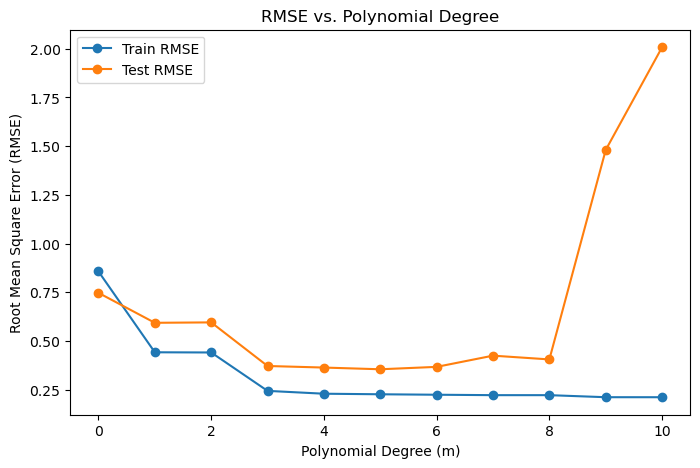

(0, 0.8570606234439588, 0.747268364185172)
(1, 0.44229946901344247, 0.5935949636028289)
(2, 0.441314965682919, 0.5957110445316898)
(3, 0.24426921898418782, 0.371942976172047)
(4, 0.22968276125805726, 0.36393172002148544)
(5, 0.22681133051783176, 0.35513774288891475)
(6, 0.22445294828005177, 0.36745016913442413)
(7, 0.2222819395206743, 0.42500830975351905)
(8, 0.22226057497053628, 0.40566901901016855)
(9, 0.21177883695550695, 1.4807585500074898)
(10, 0.21168916923506106, 2.0077789954326053)
Done!
Done!


In [133]:
######################################################################
# main
######################################################################
import time
def main():
    # load data
    train_data = load_data(train_path)
    test_data = load_data(test_path)


    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')
    # train_data.plot()
    # test_data.plot()
    #It seems as though the data looks to have a polynomial trend to it somehting like a sine

    ### ========== TODO : END ========== ###



    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression
    print('Investigating linear regression...')
    #part b
    train_data = load_data(train_path)  # Load dataset
    model = PolynomialRegression()      # Initialize model
    model.coef_ = np.zeros(2)           # Set coefficients to zero
    print(model.cost(train_data.X, train_data.y))  # Should return 40.234
    
    #part d
    print("\nPart d:")
    print("Experimenting with Gradient Descent\n")
    print("Learning Rate | Iterations | Final Cost | Coefficients")
    print("------------------------------------------------------")
    learning_rates = [1e-6, 1e-5, 1e-3, 0.1]
    ### ========== TODO : END ========== ###
    for eta in learning_rates:
        model = PolynomialRegression(m=1)
        model.fit_GD(train_data.X, train_data.y, eta=eta)
        
        iterations = 10000
        final_cost = model.cost(train_data.X, train_data.y)

        print(f"{eta}       | {iterations} | {final_cost} | {model.coef_}")
    #1.
    #Lower learning rates take longer to converge but reach stable coefficients
    #Higher learning rates reach optimal coefficients faster
    #2. 
    #1e-6, 1e-5 take full 10,000 iterations.
    # 1e-3, 0.1 converge much faster.
    #3.
    # η = 0.1 is still stable, but it converges much faster because the learning rate is large enough to accelerate updates.
    # If you see oscillations in convergence, you might want to reduce η slightly (e.g., 0.05).
    # If η were too large (e.g., 0.17), it would likely fail to converge or diverge.
    
    #part e
    print("\nPart e:")
    print("Closed-Form Solution vs Gradient Descent\n")
    print("Method        | Iterations | Final Cost | Coefficients")
    print("------------------------------------------------------")

    # **Closed-Form Solution**
    model_closed = PolynomialRegression(m=1)
    model_closed.fit(train_data.X, train_data.y)  # One-step solution
    cost_closed = model_closed.cost(train_data.X, train_data.y)
    print(f"Closed-Form   |        N/A | {cost_closed:>10.4f} | {model_closed.coef_}")

    # **Gradient Descent (example with η = 0.02)**
    eta = 0.02
    model_gd = PolynomialRegression(m=1)
    model_gd.fit_GD(train_data.X, train_data.y, eta=eta)  # Run GD
    cost_gd = model_gd.cost(train_data.X, train_data.y)
    print(f"Gradient Des. |      10000 | {cost_gd:>10.4f} | {model_gd.coef_}")
    
    #part f
    print("\nPart f:")
    print("\nTesting Adaptive Learning Rate Gradient Descent\n")
    print("Method        | Iterations | Final Cost | Coefficients| Runtime")
    print("------------------------------------------------------")
    start_time = time.time()
    model.fit_GD(train_data.X, train_data.y, eta=0.02)
    stop_time = time.time()
    run_time = stop_time - start_time
    cost_gd = model_gd.cost(train_data.X, train_data.y)
    print(f"Gradient Des. |      10000 | {cost_gd:>10.4f} | {model_gd.coef_} | {run_time}")

    start = time.time()
    model.fit(train_data.X, train_data.y)
    stop = time.time()
    run_time = stop - start
    cost_closed = model_closed.cost(train_data.X, train_data.y)
    print(f"Closed-Form   |        N/A | {cost_closed:>10.4f} | {model_closed.coef_} | {run_time}")

    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('\nInvestigating polynomial regression...')
    train_errors = []
    test_errors = []
    degrees = range(11)  # m = 0 to 10
    
    X_train = train_data.X
    y_train = train_data.y
    X_test = test_data.X
    y_test = test_data.y
    
    for m in degrees:
        model = PolynomialRegression(m)
        model.fit(X_train, y_train)

        # Compute RMSE for train and test sets
        train_rmse = model.rms_error(X_train, y_train)
        test_rmse = model.rms_error(X_test, y_test)

        train_errors.append(train_rmse)
        test_errors.append(test_rmse)
        
   
    plt.figure(figsize=(8,5))
    plt.plot(degrees, train_errors, label="Train RMSE", marker="o")
    plt.plot(degrees, test_errors, label="Test RMSE", marker="o")
    
    plt.xlabel("Polynomial Degree (m)")
    plt.ylabel("Root Mean Square Error (RMSE)")
    plt.title("RMSE vs. Polynomial Degree")
    plt.legend()
    plt.show()
    

    ### ========== TODO : END ========== ###
    for x in list(zip(degrees, train_errors, test_errors)):
      print(x)
    print("Done!")

    print("Done!")

if __name__ == "__main__":
    main()
